## Plot (a) Hydrogen or LOHC transport cost and (b) total system cost vs. delivery distance

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to use for plots
folder = 'outputs 2024-08-13 deliv dist'

In [4]:
# variable names to plot
x_var = 'one-way delivery distance (mile)'
y_var = 'total levelized cost of hydrogen ($/kg H2)'

### READ RESULTS: Costs by pathway and process

In [5]:
# read csv
f = 'output_cost by process.csv'
df = pd.read_csv(
    os.path.join('..\outputs', folder, f), 
    index_col='run #'
    )

# extract baseline value of input parameter
x_var_base = df.loc[
    df['scenario'] == 'closed loop', 
    x_var
].values[0]

# filter for sensitivity cases
df = df.loc[df['scenario'].str.contains('0 mi')]

# rename pathways
df['pathway'] = df['pathway'].str.replace('compressed', 'Compr.')
df['pathway'] = df['pathway'].str.replace('liquid', 'Liq.')

In [6]:
# extract output dollar year
output_dollar_year = df['output dollar year'].values[0]

output_dollar_year

2022

In [7]:
# keep used columns
df = df[[
    x_var, 
    'pathway', 
    'process', 
    y_var
]]

df

,one-way delivery distance (mile),pathway,process,total levelized cost of hydrogen ($/kg H2)
run #,,,,
3,10,LOHC - formic acid,preconditioning,0.005925
3,10,LOHC - formic acid,production,24.903605
3,10,LOHC - formic acid,reconditioning,6.087458
3,10,LOHC - formic acid,transport,0.612498
3,10,Compr. hydrogen,preconditioning,2.480970
...,...,...,...,...
13,500,Compr. hydrogen,transport,3.318554
13,500,Liq. hydrogen,preconditioning,4.788748
13,500,Liq. hydrogen,production,0.310093


### DATA PROCESSING: Hydrogen and LOHC transport costs by pathway

In [8]:
# filter for hydrogen and LOHC transport costs
# excluding CO2 recycling
df_truck = df.loc[df['process'] == 'transport']

# pivot dataframe
df_truck = df_truck.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_truck

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
one-way delivery distance (mile),,,
10,0.278075,0.612498,0.194321
50,0.522182,0.788887,0.245471
100,0.877489,0.994497,0.309408
150,1.165898,1.200107,0.432850
200,1.454306,1.405717,0.496787
250,1.809613,1.551823,0.560724
300,2.098022,1.757433,0.684166
350,2.386430,1.963043,0.748104
400,2.741737,2.168653,0.871546


### DATA PROCESSING: Total system costs by pathway

In [9]:
# calculate total costs by pathway
df_tot = df.groupby(
    by=[x_var, 'pathway']
)[y_var].sum().reset_index()

# pivot dataframe
df_tot = df_tot.pivot(
    index=x_var,
    columns='pathway',
    values=y_var
)

df_tot

pathway,Compr. hydrogen,LOHC - formic acid,Liq. hydrogen
one-way delivery distance (mile),,,
10,5.572540,31.609486,7.159388
50,5.816646,31.897471,7.210538
100,6.171953,32.243546,7.274475
150,6.460362,32.589843,7.397917
200,6.748770,32.936139,7.461854
250,7.104078,33.933182,7.525791
300,7.392486,34.930225,7.649233
350,7.680895,35.277225,7.713171
400,8.036202,35.624225,7.836613


### PLOT: Total terminal and system costs vs. terminal storage duration

In [10]:
# define colors (and order) for delivery pathways
pw_colors = {
    'Compr. hydrogen' : '#d95f02',
    'Liq. hydrogen' : '#1b9e77',
    'LOHC - formic acid' : '#7570b3',
    }

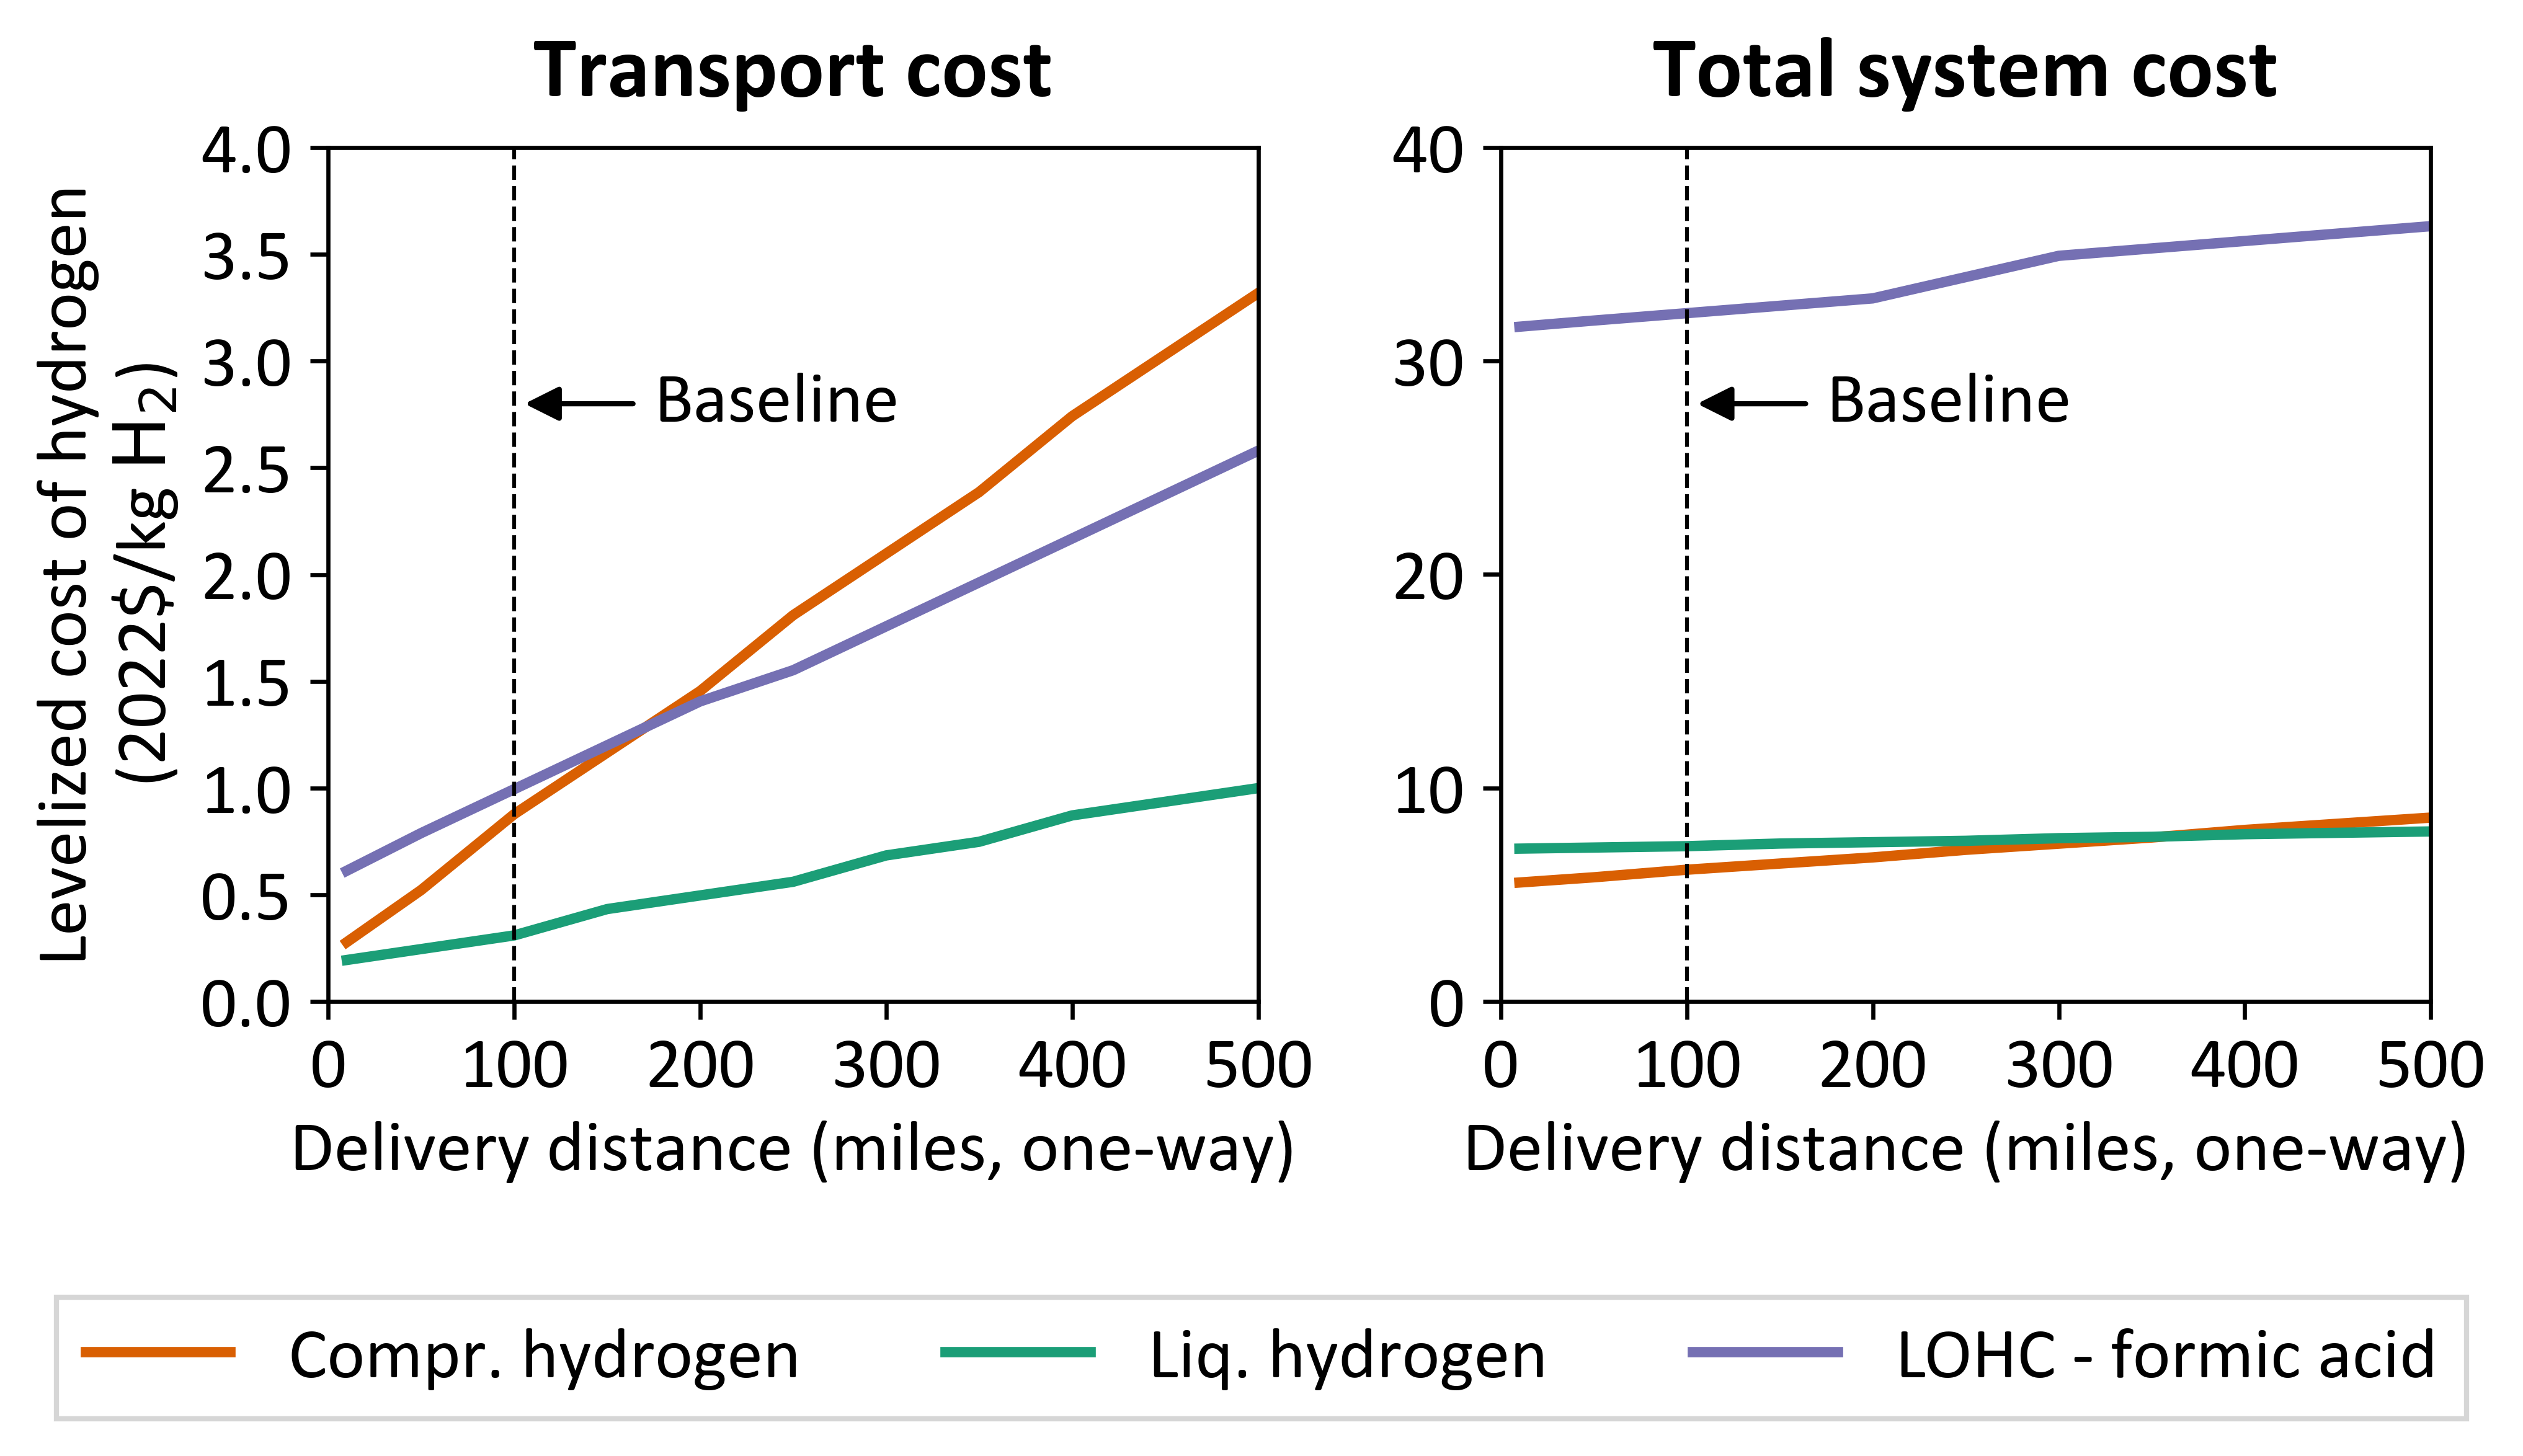

In [11]:
# create subplots
fig, axes = plt.subplots(
    figsize=(7, 3.5),
    ncols=2,
    layout='tight',
    dpi=600
    )

for pw, color in pw_colors.items():

    # plot hydrogen and LOHC transport costs
    df_truck[pw].plot(
        ax=axes[0],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1000, 100),
        xlim=(0, 500),
        xlabel='Delivery distance (miles, one-way)',
        ylabel='Levelized cost of hydrogen\n' + \
            '({:0.0f}\\$/kg'.format(output_dollar_year) + \
            ' ${H_2}$)',
        yticks=np.arange(0, 10, 0.5),
        ylim=(0, 4),
        )

    # plot total system costs
    df_tot[pw].plot(
        ax=axes[1],
        linewidth=2.0,
        color=color,
        xticks=np.arange(0, 1000, 100),
        xlim=(0, 500),
        xlabel='Delivery distance (miles, one-way)',
        yticks=np.arange(0, 101, 10),
        ylim=(0, 40),
        )

# update x-axis ticks
for ax in axes:
    ax.xaxis.set_major_formatter('{x:0,.0f}')

# add vertical lines and annotations for baseline input parameter
for ax in axes:
    ax.axvline(
        x=x_var_base,
        color='black',
        linewidth=0.75,
        linestyle='--',
    )

    ax.annotate(
        text='Baseline',
        xy=(0.2, 0.7),
        xytext=(0.35, 0.7),
        xycoords='axes fraction',
        ha='left',
        va='center',
        arrowprops=dict(
            arrowstyle='-|>',
            color='black',
        )
    )

# update subplot title
axes[0].set_title(
    'Transport cost',
    pad=10,
    fontweight='bold',
)

axes[1].set_title(
    'Total system cost',
    pad=10,
    fontweight='bold',
)

# update legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

fig.legend(
    handles=handles, 
    labels=labels, 
    # frameon=False,
    fancybox=False,
    bbox_to_anchor=(0.5, 0), 
    loc='upper center',
    ncols=3
    )

# save plot
plt.savefig(
    'total costs vs deliv dist.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()